In [28]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 32 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.4, 0.4, 0.4


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  


## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_1 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_1.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


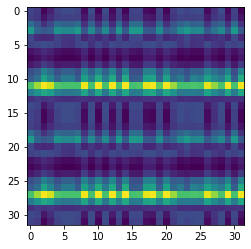

In [29]:
plt.imshow(test_1.w_EBCxHD_HD)

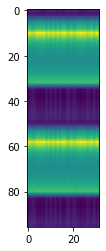

In [30]:
plt.imshow(test_1.w_EBCxHD_EBC)

In [31]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 32 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.4, 0.4, 0.4


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_2 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_2.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


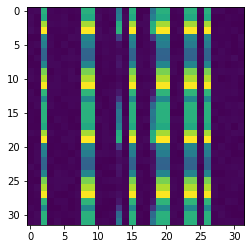

In [33]:
plt.imshow(test_2.w_EBCxHD_HD)

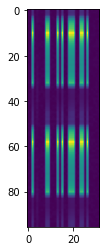

In [34]:
plt.imshow(test_2.w_EBCxHD_EBC)

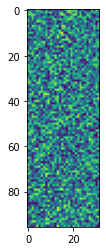

In [35]:
plt.imshow(test_2.init_w_EBCxHD_EBC)

In [37]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 32 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.4, 0.4, 0.4


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_3 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_3.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


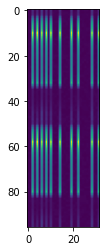

In [38]:
plt.imshow(test_3.w_EBCxHD_EBC)

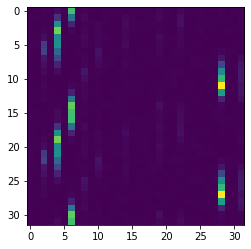

In [39]:
plt.imshow(test_3.w_EBCxHD_HD)

# lower max weight

learning rule v3 for EBC
learning rule v2 for the other two

In [1]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 32 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_4 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_4.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


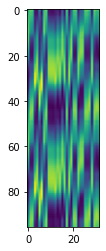

In [2]:
plt.imshow(test_4.w_EBCxHD_EBC)

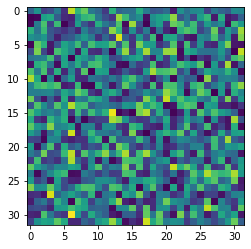

In [3]:
plt.imshow(test_4.w_EBCxHD_HD)

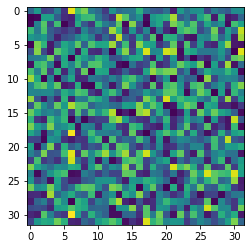

In [4]:
plt.imshow(test_4.init_w_EBCxHD_HD)

## using learning rule v3 for all of them

In [5]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 32 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_5 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_5.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


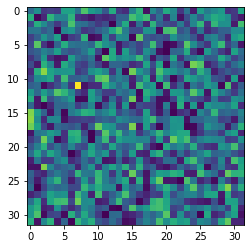

In [6]:
plt.imshow(test_5.w_EBCxHD_HD)

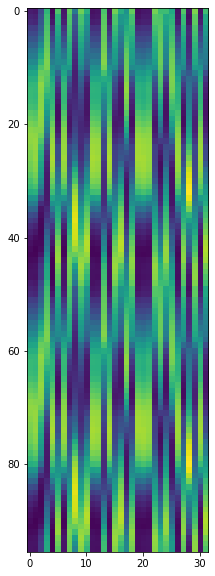

In [16]:
plt.figure(figsize =(10,10))
plt.imshow(test_5.w_EBCxHD_EBC)

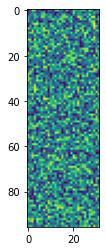

In [14]:
plt.imshow(test_5.init_w_EBCxHD_EBC)

In [1]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 32 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_6 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_6.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


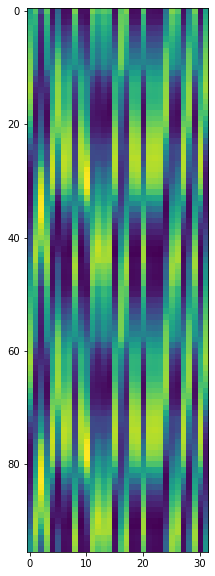

In [2]:
plt.figure(figsize =(10,10))
plt.imshow(test_6.w_EBCxHD_EBC)

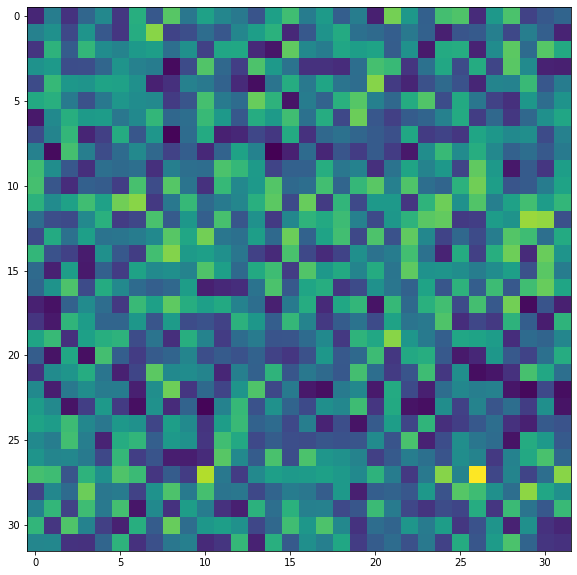

In [3]:
plt.figure(figsize =(10,10))
plt.imshow(test_6.w_EBCxHD_HD)

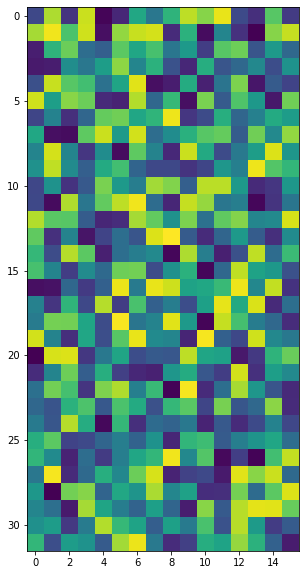

In [7]:
plt.figure(figsize =(10,10))
plt.imshow(test_6.w_ABC_EBCxHD)

In [15]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 96 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_7 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_7.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


In [16]:
os.system('say "done"')

0

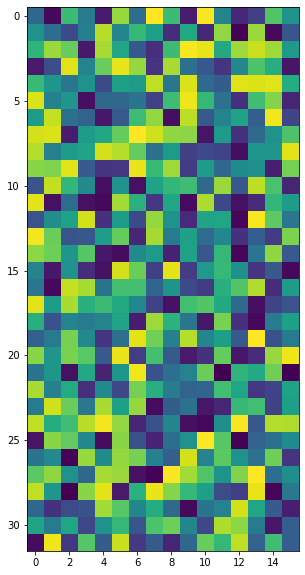

In [17]:
plt.figure(figsize =(10,10))
plt.imshow(test_7.w_ABC_EBCxHD)

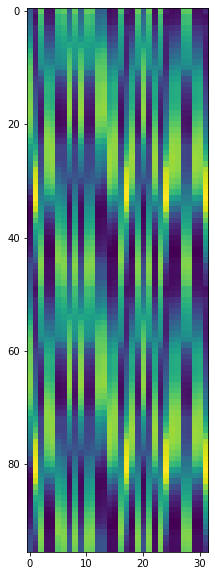

In [21]:
plt.figure(figsize = (10,10))
plt.imshow(test_7.w_EBCxHD_EBC)

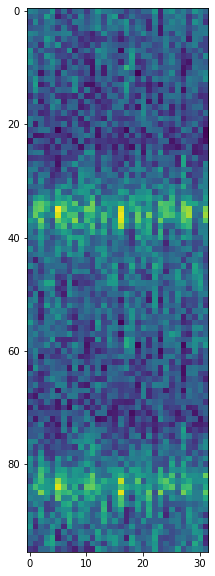

In [20]:
plt.figure(figsize = (10,10))
plt.imshow(test_7.w_EBCxHD_HD)

In [22]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 96 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_8 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_8.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


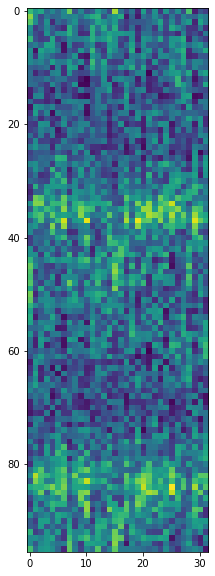

In [23]:
plt.figure(figsize = (10,10))
plt.imshow(test_8.w_EBCxHD_HD)

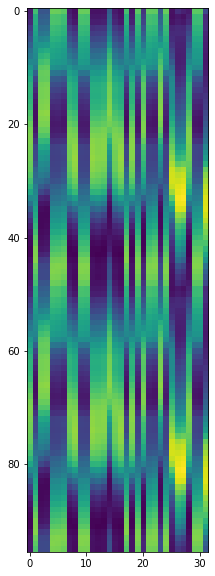

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(test_8.w_EBCxHD_EBC)

In [46]:
xs = np.linspace(-180,180)
ys0 = np.cos((xs*np.pi/180))
ys1 = np.cos((xs-7)*np.pi/180)
ys2 = np.cos(xs-7)

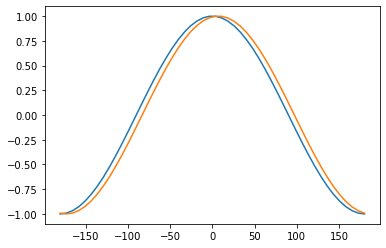

In [48]:
plt.plot(xs,ys0)
plt.plot(xs,ys1)

In [131]:
import math
def pdf(x, mu=0.0, sigma=20.0):
    x = float(x - mu) / sigma
    val = math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma
    return val/0.02659615202676218


xs = np.linspace(-180,180)
ys3 = [pdf(i) for i in xs]
ys4 = [pdf(i+20) for i in xs]
plt.plot(xs,ys3)
plt.plot(xs,ys4)

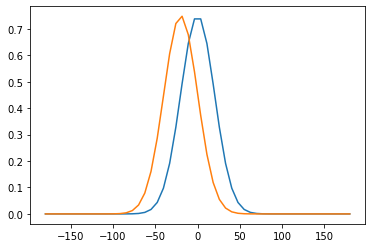

In [132]:
xs = np.linspace(-180,180)
ys3 = [pdf(i) for i in xs]
ys4 = [pdf(i+20) for i in xs]
plt.plot(xs,ys3)
plt.plot(xs,ys4)

In [133]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 96 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_9 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_9.run_network(3)

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


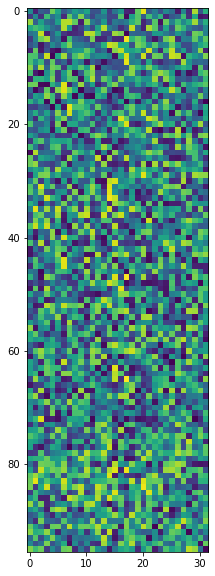

In [137]:
plt.figure(figsize=(10,10))
plt.imshow(test_9.w_EBCxHD_HD)

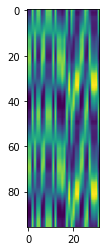

In [136]:
plt.imshow(test_9.w_EBCxHD_EBC)

In [134]:
os.system('say "done"')

0

In [110]:
def pdf(x, mu=0.0, sigma=15.0):
    x = float(x - mu) / sigma
    val = math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma
    return val/0.0265961520

pdf(3)

0.9801986742930728

In [140]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 96 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_10 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_10.run_network(3)
os.system('say "done"')

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


0

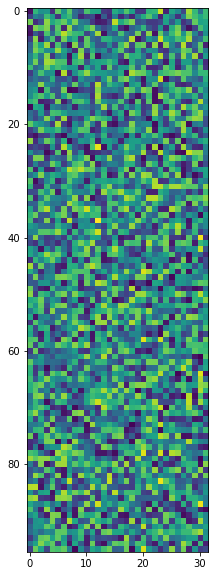

In [142]:
plt.figure(figsize=(10,10))
plt.imshow(test_10.w_EBCxHD_HD)

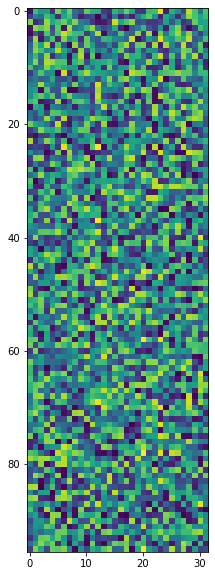

In [143]:
plt.figure(figsize=(10,10))
plt.imshow(test_10.init_w_EBCxHD_HD)

In [145]:
test_10.w_EBCxHD_HD[0]

array([1.00891932e-05, 1.17547666e-04, 9.17023679e-05, 9.45969649e-05,
       2.67865337e-05, 1.35219563e-04, 9.18860090e-05, 1.32133106e-04,
       6.31855318e-05, 4.64181468e-05, 1.27923707e-04, 1.07071003e-04,
       1.05618531e-04, 3.14768713e-05, 2.72487946e-05, 1.10604376e-04,
       9.20591002e-05, 1.30422105e-04, 1.01760072e-04, 3.22452399e-05,
       2.98599327e-05, 1.15685510e-04, 1.18533099e-04, 1.62780795e-04,
       1.87673009e-05, 1.06416899e-04, 8.54449089e-05, 3.92218883e-05,
       1.53905906e-04, 1.20263206e-04, 6.68270686e-05, 1.21846244e-04])

In [146]:
test_10.init_w_EBCxHD_HD[0]

array([8.20057696e-06, 1.24294988e-04, 9.60958084e-05, 9.96183288e-05,
       2.64799457e-05, 1.44452654e-04, 9.64095747e-05, 1.40218094e-04,
       6.49659929e-05, 4.75339009e-05, 1.36251661e-04, 1.13282565e-04,
       1.11759639e-04, 3.12518565e-05, 2.46195031e-05, 1.17331207e-04,
       9.64714084e-05, 1.38439942e-04, 1.06887375e-04, 3.20906831e-05,
       2.77684902e-05, 1.22456774e-04, 1.25554645e-04, 1.72981175e-04,
       1.53366430e-05, 1.12788830e-04, 8.99121387e-05, 4.03294409e-05,
       1.63421165e-04, 1.28184427e-04, 6.68831833e-05, 1.29180986e-04])

## all learning rule v3

In [193]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 96 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_11 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_11.run_network(3)
os.system('say "done"')

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


0

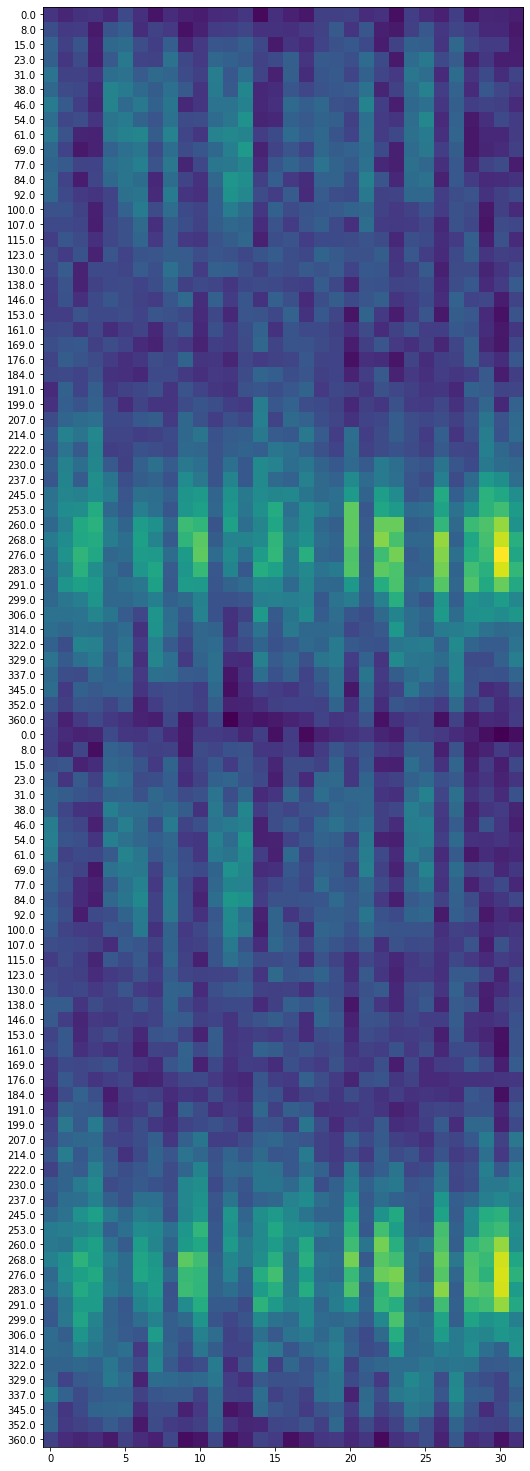

In [227]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.imshow(test_11.w_EBCxHD_HD)
ax.set_yticks(np.arange(0,96));
ax.set_yticklabels(np.round(test_11.HD_fields[:,0]));

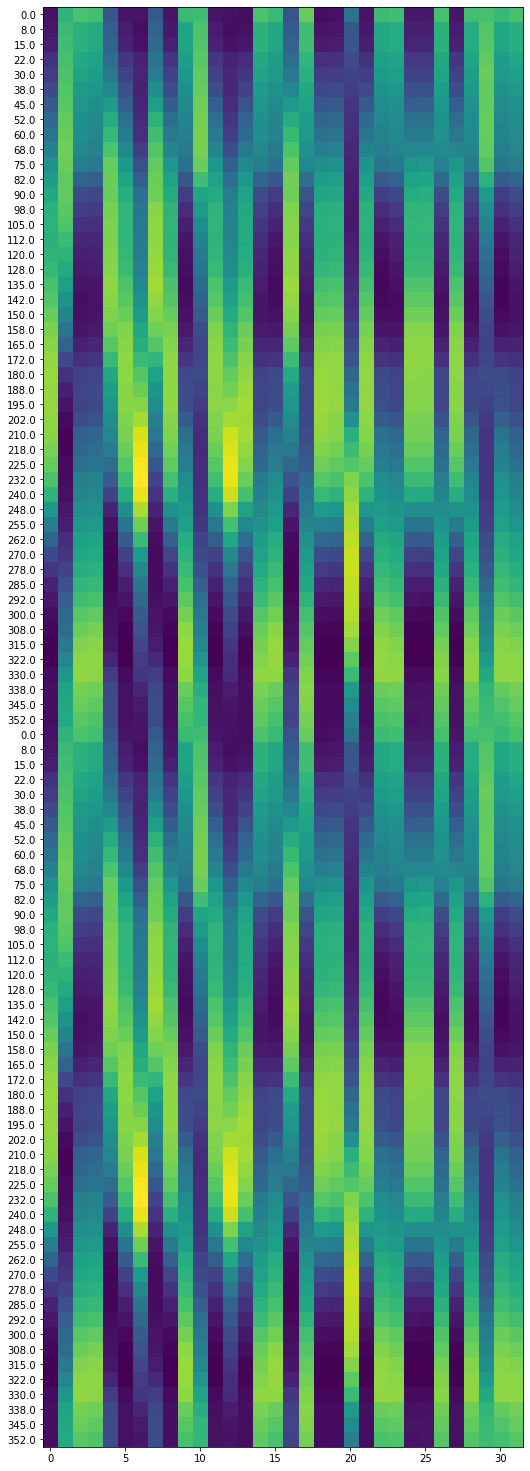

In [223]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.imshow(test_11.w_EBCxHD_EBC)
ax.set_yticks(np.arange(0,96));
ax.set_yticklabels(np.round(7.5*test_11.EBC_fields[:,1]));

In [270]:
def get_thresh(rates, start):
    
    spikes = rates>start
    s = np.sum(spikes)
    if s <= 4000 and s>=3000:
        print(start)
        return start
    else:
        if s>3000:
            return get_thresh(rates, start*1.1)
        if s == 0:
            return get_thresh(rates, start*0.9)
        if s < 4000:
            return get_thresh(rates, start*0.8)
         

In [266]:
def get_thresh(rates, start):
    
    spikes = rates>start
    s = np.sum(spikes)
    if s <= 10000 and s>=7000:
        return start
    else:
        if s>7000:
            return get_thresh(rates, start*1.1)
        if s == 0:
            return get_thresh(rates, start*0.9)
        if s < 10000:
            return get_thresh(rates, start*0.8)
         

In [267]:
spikes

array([False, False, False, ..., False, False, False])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


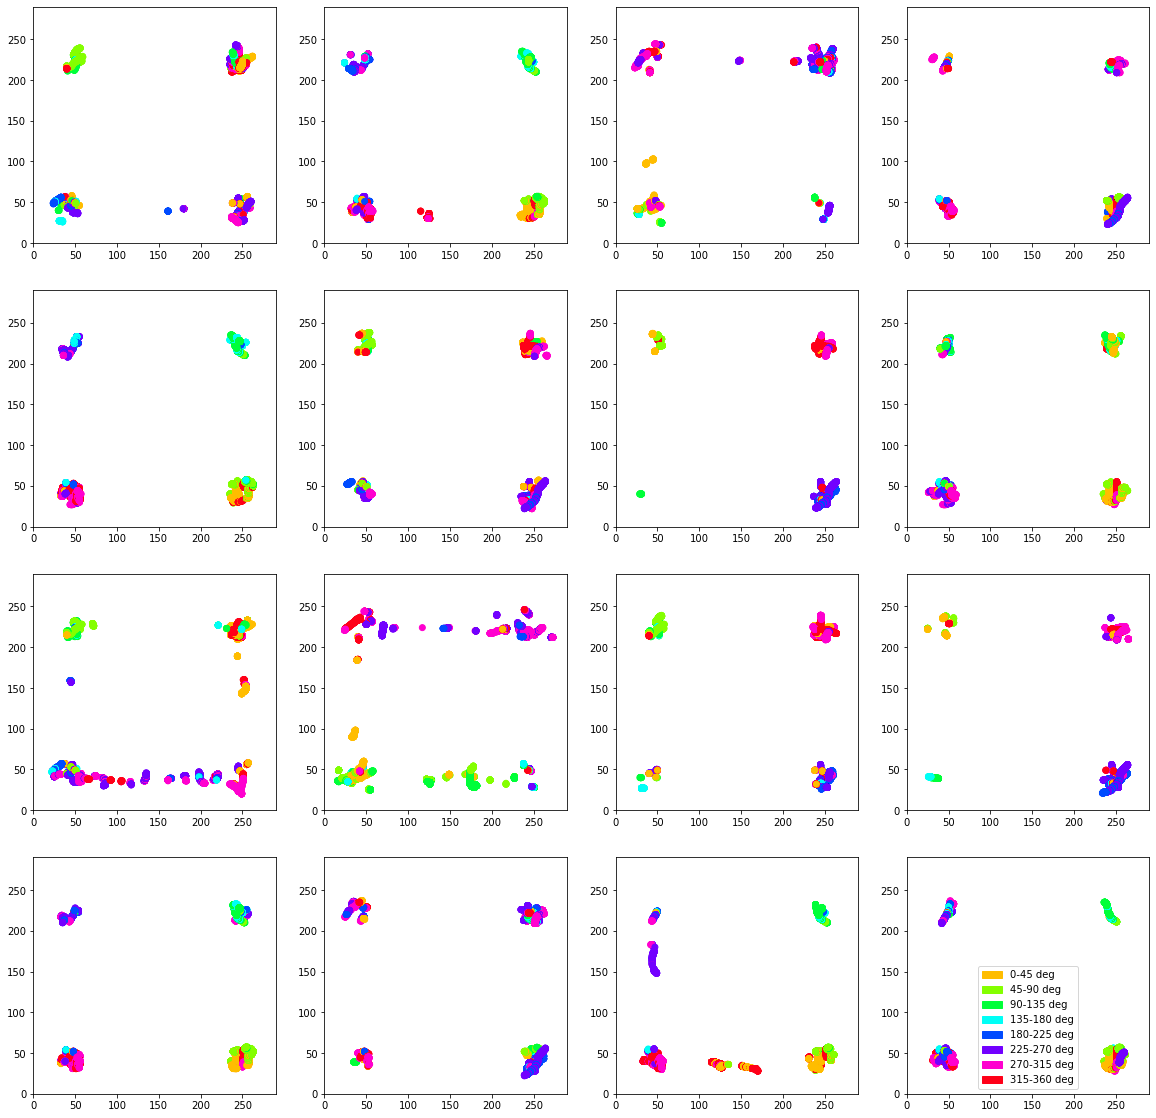

In [268]:

### lowering # spikes to be between 2000 and 3000

net = test_11

fig, ax = plt.subplots(4,4, figsize=(20,20))
xs = net.x_ind
ys = net.y_ind
cell_num = 0
start = 0.001
for i in range(4):
    for j in range(4):
        cell_num = 4*i + j
        if cell_num<16:
            print(cell_num)
            rates = test_11.rates_ABC[cell_num]
            thresh = get_thresh(rates, start)
            spikes = rates>thresh
            filt_x = xs[spikes]
            filt_y = ys[spikes]
            filt_head = np.array(net.headdir_ind[spikes])
            pos_head=[filt_head[i] if filt_head[i]>0 else filt_head[i]+360 for i in range(len(filt_head))]
            bins = np.digitize(pos_head,[0,45,90,135,180,225,270,315,360])
            colors = [cm.hsv(bins[i]/8) for i in range(len(bins))]
            ax[i,j].scatter(filt_x,filt_y, c=colors)
            ax[i,j].set_xlim(0,290)
            ax[i,j].set_ylim(0,290)
            
            
            
import matplotlib.patches as mpatches
p_1 =  mpatches.Patch(color=cm.hsv(1/8), label="0-45 deg")
p_2 =  mpatches.Patch(color=cm.hsv(2/8), label="45-90 deg")
p_3 =  mpatches.Patch(color=cm.hsv(3/8), label="90-135 deg")
p_4 =  mpatches.Patch(color=cm.hsv(4/8), label="135-180 deg")
p_5 =  mpatches.Patch(color=cm.hsv(5/8), label="180-225 deg")
p_6 =  mpatches.Patch(color=cm.hsv(6/8), label="225-270 deg")
p_7 =  mpatches.Patch(color=cm.hsv(7/8), label="270-315 deg")
p_8 =  mpatches.Patch(color=cm.hsv(8/8), label="315-360 deg")


plt.legend(handles=[p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8])
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


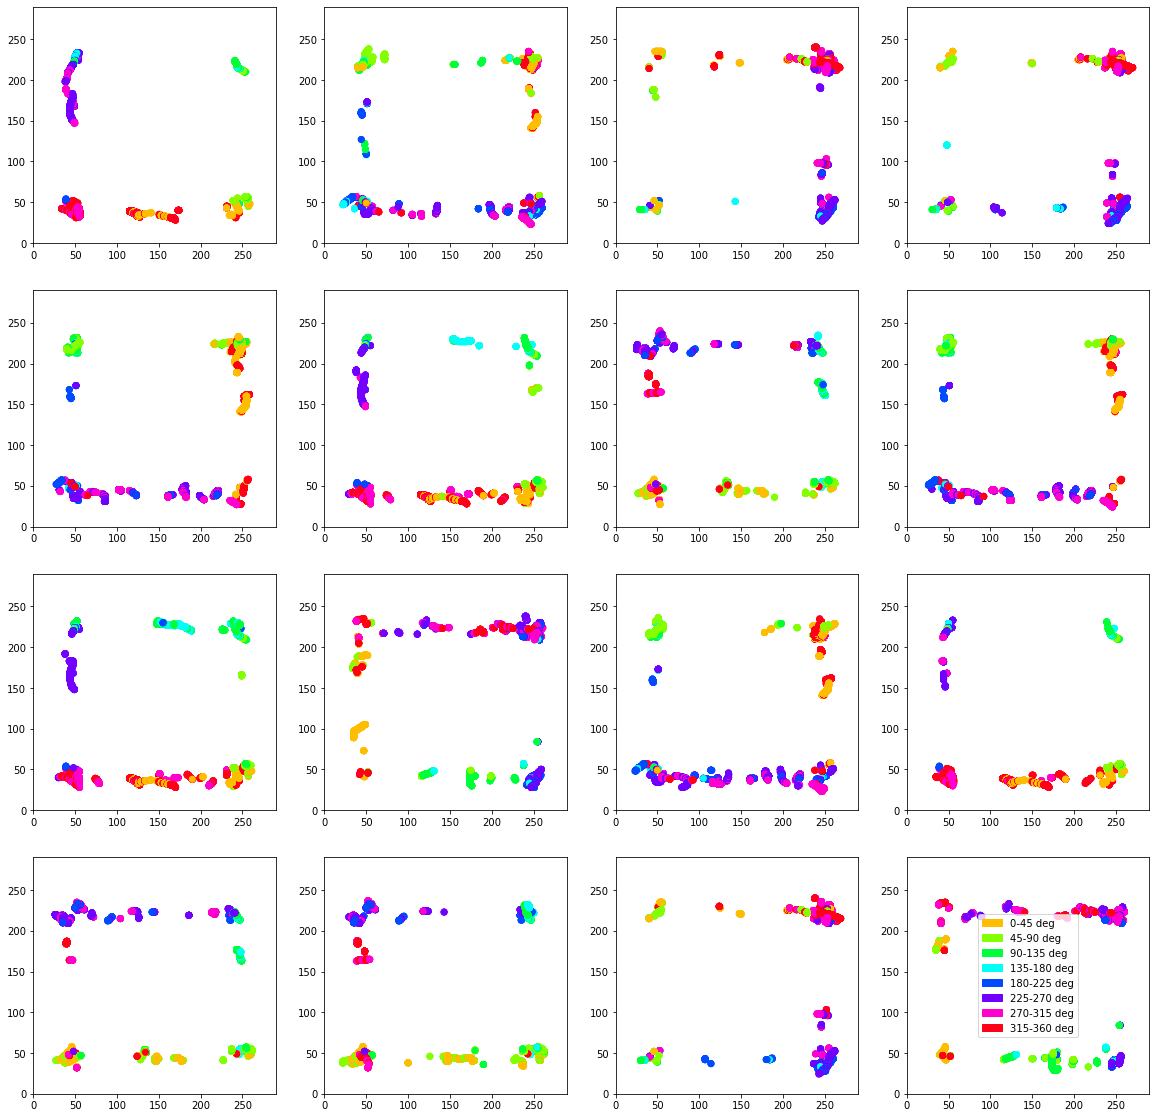

In [269]:

### lowering # spikes to be between 2000 and 3000

net = test_11

fig, ax = plt.subplots(4,4, figsize=(20,20))
xs = net.x_ind
ys = net.y_ind
cell_num = 0
start = 0.001
for i in range(4):
    for j in range(4):
        cell_num = 4*i + j
        if cell_num<16:
            print(cell_num)
            rates = test_11.rates_EBCxHD[cell_num]
            thresh = get_thresh(rates, start)
            spikes = rates>thresh
            filt_x = xs[spikes]
            filt_y = ys[spikes]
            filt_head = np.array(net.headdir_ind[spikes])
            pos_head=[filt_head[i] if filt_head[i]>0 else filt_head[i]+360 for i in range(len(filt_head))]
            bins = np.digitize(pos_head,[0,45,90,135,180,225,270,315,360])
            colors = [cm.hsv(bins[i]/8) for i in range(len(bins))]
            ax[i,j].scatter(filt_x,filt_y, c=colors)
            ax[i,j].set_xlim(0,290)
            ax[i,j].set_ylim(0,290)
            
            
            
import matplotlib.patches as mpatches
p_1 =  mpatches.Patch(color=cm.hsv(1/8), label="0-45 deg")
p_2 =  mpatches.Patch(color=cm.hsv(2/8), label="45-90 deg")
p_3 =  mpatches.Patch(color=cm.hsv(3/8), label="90-135 deg")
p_4 =  mpatches.Patch(color=cm.hsv(4/8), label="135-180 deg")
p_5 =  mpatches.Patch(color=cm.hsv(5/8), label="180-225 deg")
p_6 =  mpatches.Patch(color=cm.hsv(6/8), label="225-270 deg")
p_7 =  mpatches.Patch(color=cm.hsv(7/8), label="270-315 deg")
p_8 =  mpatches.Patch(color=cm.hsv(8/8), label="315-360 deg")


plt.legend(handles=[p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8])
plt.show()

In [280]:
xs = test_11.x_ind.flatten()
ys = test_11.y_ind.flatten()

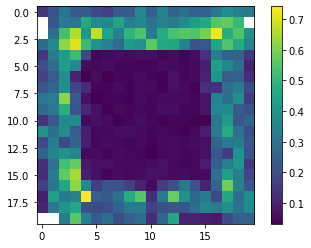

In [290]:
import scipy
statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,test_11.rates_EBCxHD[0], bins = 20)
plt.imshow(statistic)
plt.colorbar()

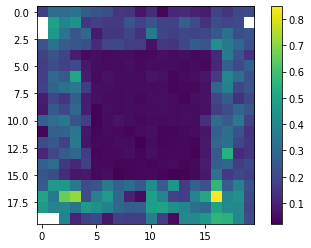

In [292]:
rates = test_11.rates_EBCxHD[31]
statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 20)
plt.imshow(statistic)
plt.colorbar()

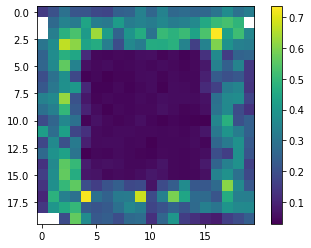

In [294]:
rates = test_11.rates_EBCxHD[19]
statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 20)
plt.imshow(statistic)
plt.colorbar()

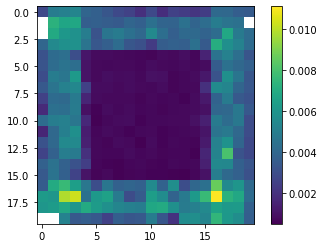

In [297]:
rates = test_11.rates_ABC[11]
statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 20)
plt.imshow(statistic)
plt.colorbar()

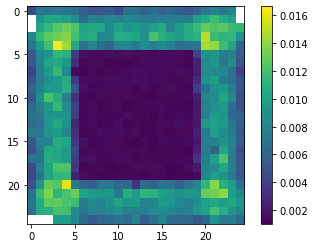

In [302]:
rates = test_11.rates_ABC[7]
statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 25)
plt.imshow(statistic)
plt.colorbar()

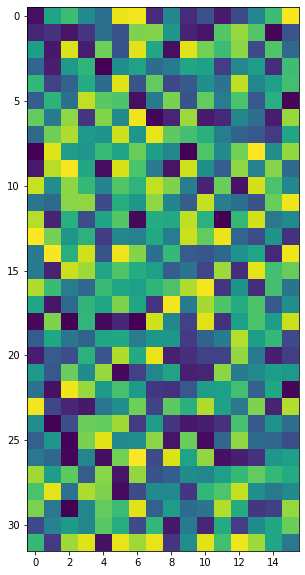

In [198]:
plt.figure(figsize=(10,10))
plt.imshow(test_11.w_ABC_EBCxHD)

# head direction cells update each iteration

In [321]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 96 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_12 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_12.run_network(3)
os.system('say "done"')

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


0

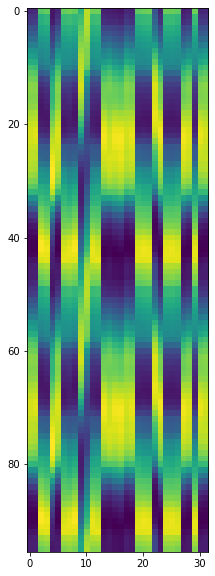

In [325]:
plt.figure(figsize=(10,10))
plt.imshow(test_12.w_EBCxHD_EBC)

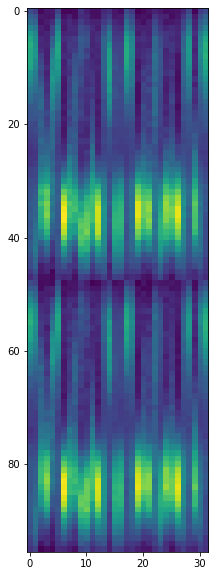

In [324]:
plt.figure(figsize=(10,10))
plt.imshow(test_12.w_EBCxHD_HD)

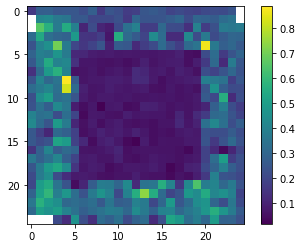

In [339]:
rates = test_12.rates_EBCxHD[10]
xs = test_12.x_ind.flatten()
ys = test_12.y_ind.flatten()
statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 25)
plt.imshow(statistic)
plt.colorbar()

In [ ]:
xs = test_12.x_ind.flatten()
ys = test_12.y_ind.flatten()
rates = test_12.rates_EBCxHD[10]

fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        cell_num = 4*i + j
        rates = test_12.rates_ABC[cell_num]
        statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 25)
        ax[i,j].imshow(statistic)

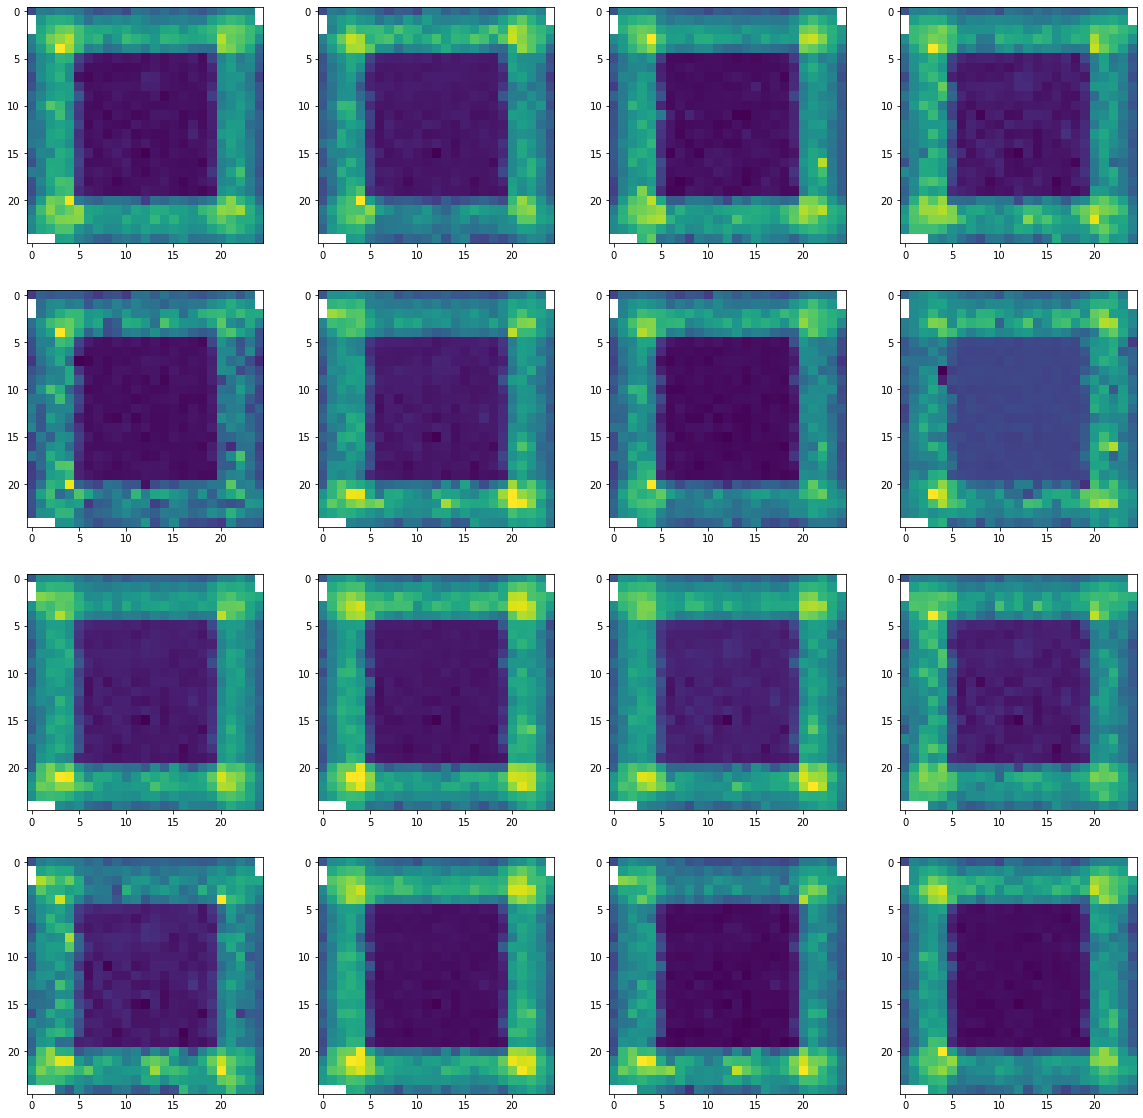

In [346]:
xs = test_12.x_ind.flatten()
ys = test_12.y_ind.flatten()
rates = test_12.rates_EBCxHD[10]

fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        cell_num = 4*i + j
        rates = test_12.rates_ABC[cell_num]
        statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 25)
        ax[i,j].imshow(statistic)

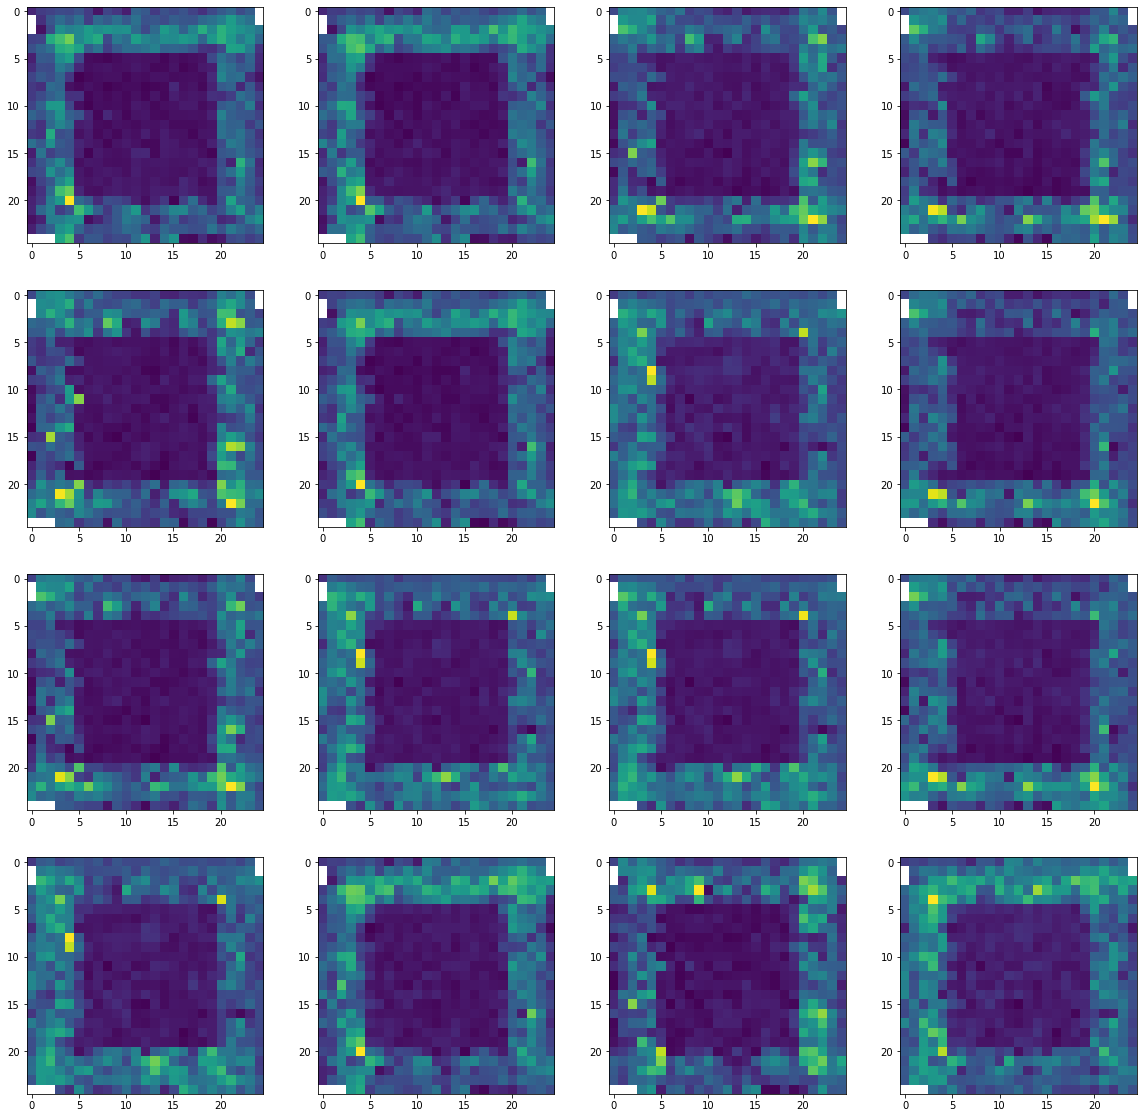

In [351]:
xs = test_12.x_ind.flatten()
ys = test_12.y_ind.flatten()
rates = test_12.rates_EBCxHD[10]

fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        cell_num = 4*i + j
        rates = test_12.rates_EBCxHD[cell_num]
        statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 25)
        ax[i,j].imshow(statistic)

# increased spiking threshold

In [1]:
import time
import numpy as np
import os
from scipy import stats, io
import clean_SetUp_j_o as SN #code for setting up initial network configuration and dealing with trajectory stuff
from pathlib import Path
import clean_Network_j_o as Network
#import clean_plot
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.cm as cm
import importlib

importlib.reload(SN)
importlib.reload(Network)
n_ABC = 16 #number of (putative) ABCs in the output layer
n_EBCxHD = 32 #number of (putative or hard coded EBCs in the middle layer)
n_EBC = 96 #number of EBCs
n_HD = 96 #number of HDs


dt = 1.0 #simulation resolution in miliseconds 
tau = 10.0## # neuron time constant in ms


####### input variables for each cell type

#maximum distance away from wall where cell is active in cm (say max since can later make range if don't want this to be uniform)
max_dis_threshold_EBC, max_dis_threshold_EBCxHD = 25,25  

#max input to cell that is weighted by other receptive field factors (e.g. head direction matching prefered HD)
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.02, 0.02, 0.02, 0.02
base_input_EBC, base_input_HD, base_input_EBCxHD, base_input_ABC = 0.1,0.1,0.1,0.1

#0 to max is intial weights for all connections (can change later if needed) 
rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD =0.022, 0.022, 0.022 
rand_weights_max_HD = 0.01
 #lateral inhibition weights
inhib_weight_EBC, inhib_weight_HD, inhib_weight_EBCxHD, inhib_weight_ABC = 0.01, 0.01, 0.01, 0.01 
inhib_weight_ABC = 0.01475

 #Hebbian learning parameter
epsilon_EBC, epsilon_HD, epsilon_EBCxHD = 0.008, 0.008, 0.008


rand_weights_max_EBC,rand_weights_max_HD, rand_weights_max_EBCxHD = 2*epsilon_EBC/n_EBC, 2*epsilon_HD/n_HD, 2*epsilon_EBCxHD/n_EBCxHD
learn_EBC, learn_HD, learn_EBCxHD = 0.00001,0.0001,0.0001
learn_EBC, learn_HD, learn_EBCxHD = 0.0000005,0.0000005,0.0000005

transform_num = 1

file2 = 'Trajectory_Data_test2_full_HD.mat'
file1 = 'Trajectory_Data_test_full_HD.mat'            
file3 = 'Trajectory_Data_test3_full_HD.mat'  

##place bias params, not currently implemented
place_bias = False
bias_size = 0.0002
n_place = 32
radius = 10
dim = 300

## classes to store cell specific info
EBC_info=Network.EBC_info(n_EBC, base_input_EBC, max_dis_threshold_EBC,rand_weights_max_EBC, inhib_weight_EBC, epsilon_EBC, learn_EBC)
HD_info=Network.HD_info(n_HD, base_input_HD, rand_weights_max_HD, inhib_weight_HD, epsilon_HD, learn_HD)
EBCxHD_info=Network.EBCxHD_info(n_EBCxHD, max_dis_threshold_EBCxHD, base_input_EBCxHD,rand_weights_max_EBCxHD, 
                                      inhib_weight_EBCxHD, epsilon_EBCxHD, learn_EBCxHD, place_bias, bias_size)
ABC_info = Network.ABC_info(n_ABC, base_input_ABC, inhib_weight_ABC)
place_info = Network.place_info(n_place,radius, dim)

learn = True
manual_weights = False

test_13 =  Network.network(ABC_info, EBCxHD_info, EBC_info, HD_info, dt, tau, manual_weights, learn, file1, place_info)
test_13.run_network(3)
os.system('say "done"')

getting trajectory data from Hass lab
Precalculations already done
place array initialized
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


0

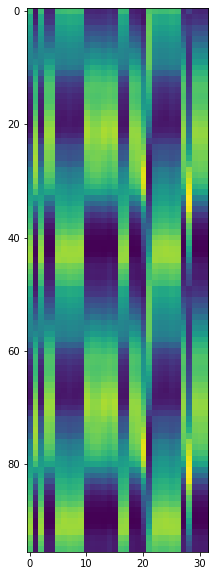

In [2]:
plt.figure(figsize=(10,10))
plt.imshow(test_13.w_EBCxHD_EBC)

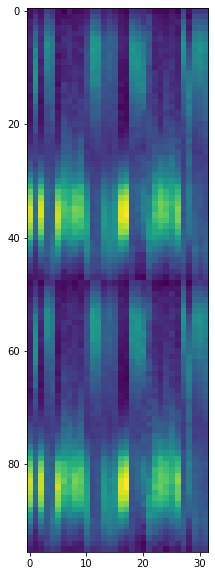

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(test_13.w_EBCxHD_HD)

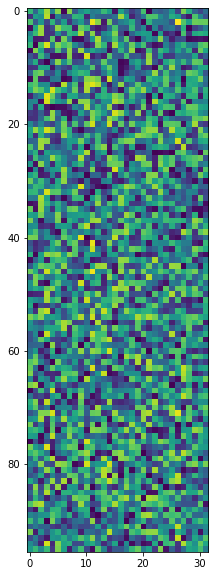

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(test_13.init_w_EBCxHD_HD)

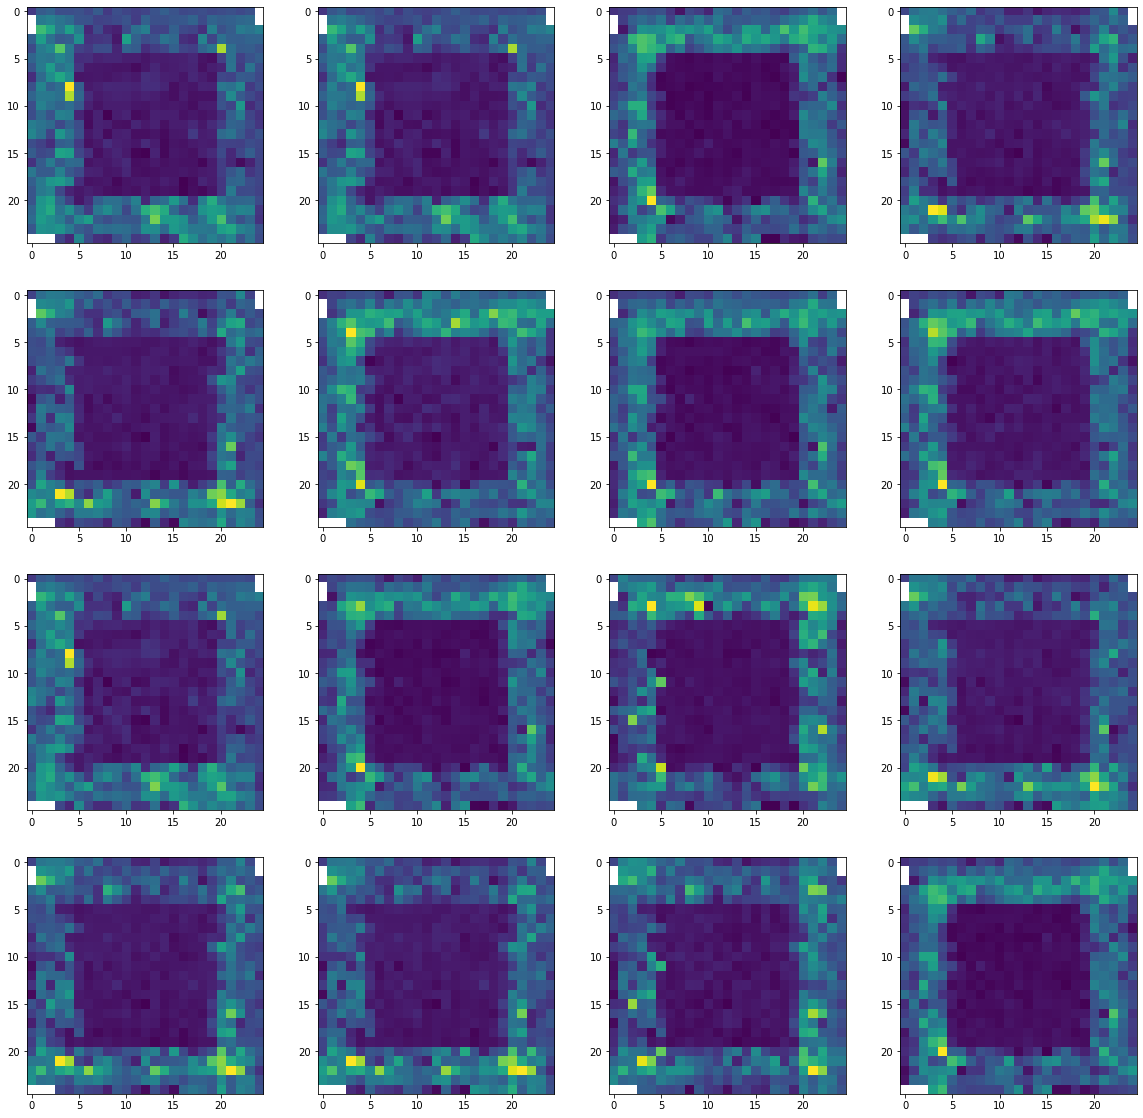

In [16]:
import scipy
xs = test_13.x_ind.flatten()
ys = test_13.y_ind.flatten()

fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        cell_num = 4*i + j
        cell_num = 2*cell_num
        rates = test_13.rates_EBCxHD[cell_num]
        statistic, xedges, yedges, bin_nums = scipy.stats.binned_statistic_2d(xs,ys,rates, bins = 25)
        ax[i,j].imshow(statistic)

In [18]:
import pickle

filehandler = open('test_13', 'w') 
pickle.dump(test_13,filehandler)

TypeError: write() argument must be str, not bytes